<a href="https://www.kaggle.com/code/mariuszcha/wine-quality?scriptVersionId=128463257" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In this project, we will delve into a comprehensive dataset containing various features of Portugese Vinho Vrerde and their respective quality scores. Our objective is to perform a thorough analysis of each independent variable to discern which factors have a significant impact on the wine's score, while also identifying which ones do not. This study aims to provide an insight into the most crucial factors contributing to the overall quality of wine, which could be helpful in assessing and improving the quality of wine production. Additionally, we plan to explore the relationships between these independent variables to gain a deeper understanding of how they interact and influence each other. Our analysis will include various statistical techniques, such as regression analysis and hypothesis testing, to draw meaningful conclusions and insights from the data. Ultimately, our findings could have practical applications in the wine industry and provide valuable insights to wine producers and enthusiasts alike.

![](https://images.pexels.com/photos/39351/purple-grapes-vineyard-napa-valley-napa-vineyard-39351.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_palette('flare')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Firstly we will do exploratory data analysis in order to find relations

In [2]:
data = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
X = data.iloc[:,:-1]
Y = data.quality

print('Checking types of columns and null-values:')
print(data.info())

Checking types of columns and null-values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


As we can see - from information table - there aren't any null values. That is definietly helpful!

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Short describtions of all variables:
* fixed acidity - corresponds to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids
* volatile acidity - a measure of the wine's gaseous acids that contributes to the smell and taste of vinegar in wine
* citric acid - increase acidity, complement a specific flavor or prevent ferric hazes
* residual sugar - the sugar left over in a wine following fermentation
* chlorides - in wines, the concentration of chloride ions is generally indicative of the presence of sodium chloride. Sodium chloride adds to the saltiness of a wine
* free sulfur dioxide - free sulfites are those available to react and thus exhibit both germicidal and antioxidant properties.
* total sulfur dioxide - the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars
* density - self-explanatory
* pH - self-explanatory
* sulphites - act as both a wine's preservative and enhancer
* alcohol - percent of alcohol in our wine

**In our next step we will - using histplots - examine distribution of data...**

<AxesSubplot: xlabel='quality', ylabel='count'>

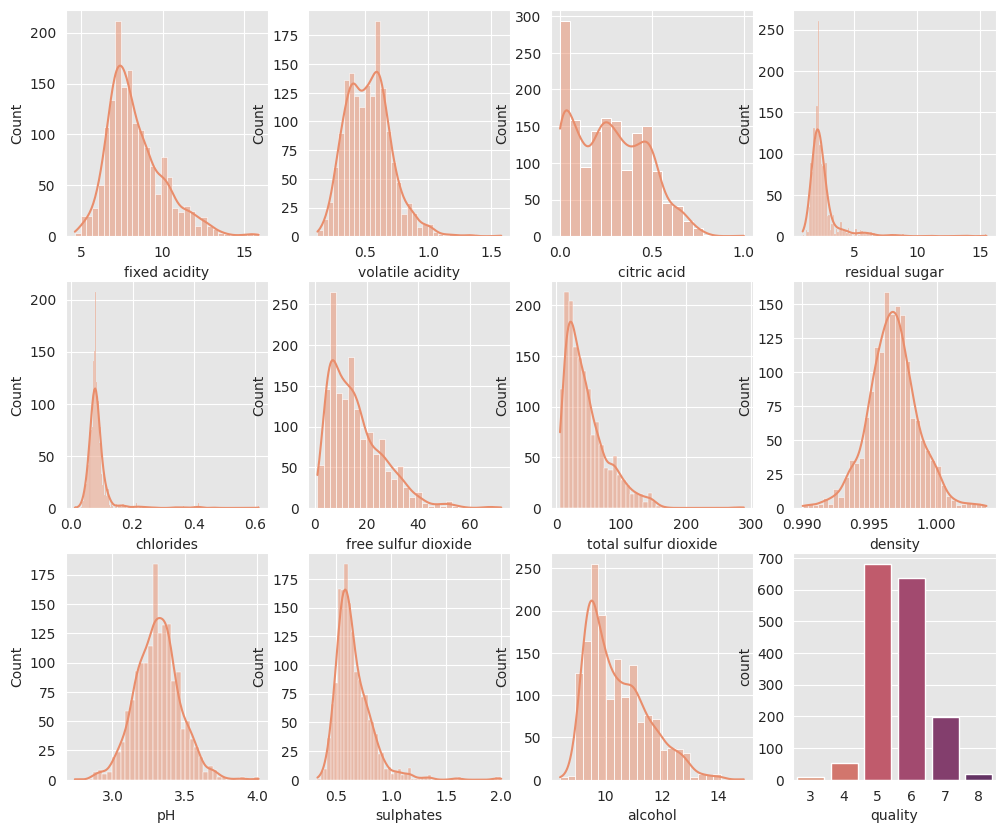

In [4]:
fig, axes = plt.subplots(3,4, figsize=(12,10))
axes = axes.flatten()
sns.histplot(ax=axes[0], x=data['fixed acidity'], kde=True)
sns.histplot(ax=axes[1], x=data['volatile acidity'], kde=True)
sns.histplot(ax=axes[2], x=data['citric acid'], kde=True)
sns.histplot(ax=axes[3], x=data['residual sugar'], kde=True)
sns.histplot(ax=axes[4], x=data['chlorides'], kde=True)
sns.histplot(ax=axes[5], x=data['free sulfur dioxide'], kde=True)
sns.histplot(ax=axes[6], x=data['total sulfur dioxide'], kde=True)
sns.histplot(ax=axes[7], x=data['density'], kde=True)
sns.histplot(ax=axes[8], x=data['pH'], kde=True)
sns.histplot(ax=axes[9], x=data['sulphates'], kde=True)
sns.histplot(ax=axes[10], x=data['alcohol'], kde=True)
sns.countplot(ax=axes[11], x=data['quality'])

As we can see from histograms - only in pH and density situation - we can talk about normal distirbution. All other independent variables are right skewed. We will definitely have to scale them in te future.

Our respose variable is also unbalanced. In the future, we will bin our dependent variable into 3 classes. It will help with classifying wines and shouldn't destroy the usability of our model. The difference between 7 and 8 mark is not that big.

**Now we will do boxplots to check whether there is relation between dependent variable and independent ones.**

<AxesSubplot: xlabel='quality', ylabel='alcohol'>

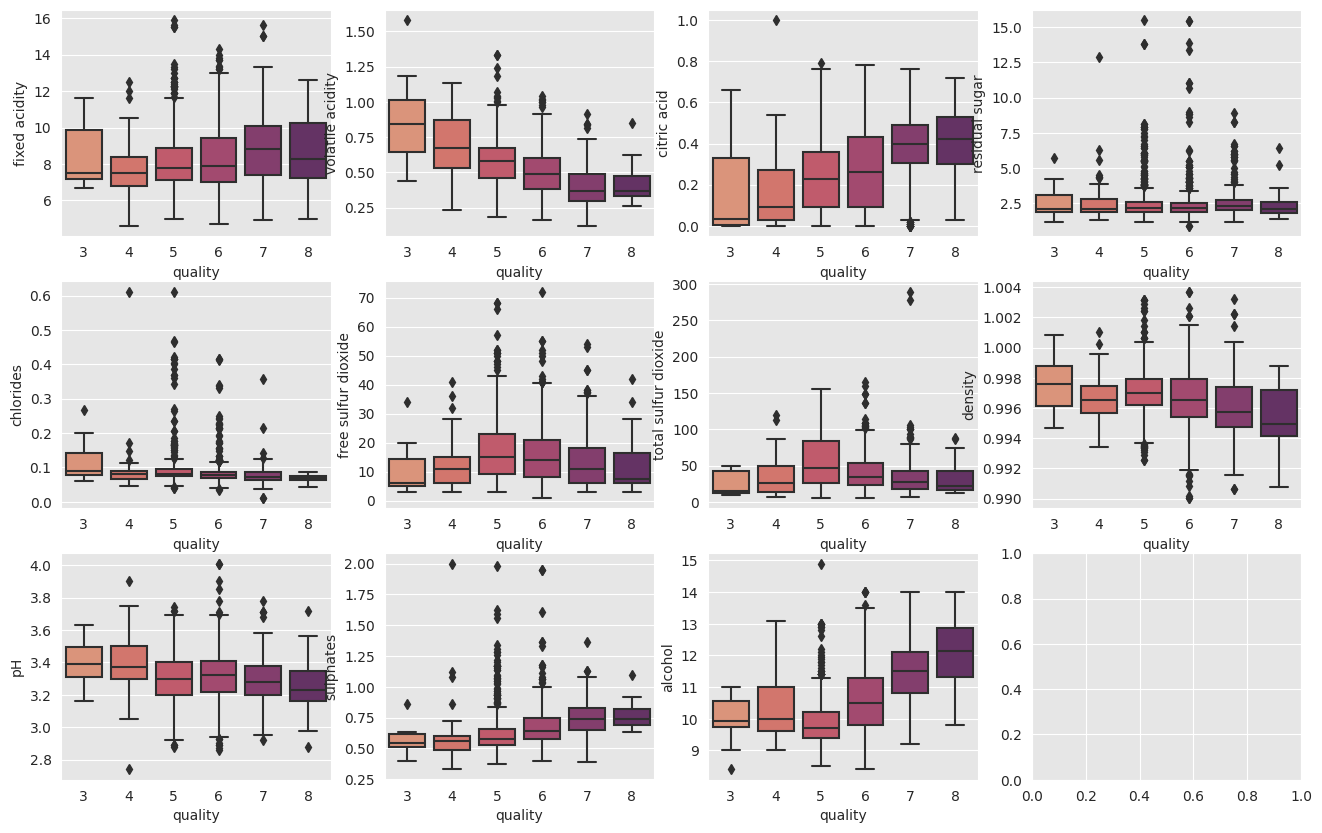

In [5]:
fig, axes = plt.subplots(3,4, figsize=(16,10))
axes = axes.flatten()

sns.boxplot(ax=axes[0],y=data['fixed acidity'], x=data['quality'])
sns.boxplot(ax=axes[1],y=data['volatile acidity'], x=data['quality'])
sns.boxplot(ax=axes[2],y=data['citric acid'], x=data['quality'])
sns.boxplot(ax=axes[3],y=data['residual sugar'], x=data['quality'])
sns.boxplot(ax=axes[4],y=data['chlorides'], x=data['quality'])
sns.boxplot(ax=axes[5],y=data['free sulfur dioxide'], x=data['quality'])
sns.boxplot(ax=axes[6],y=data['total sulfur dioxide'], x=data['quality'])
sns.boxplot(ax=axes[7],y=data['density'], x=data['quality'])
sns.boxplot(ax=axes[8],y=data['pH'], x=data['quality'])
sns.boxplot(ax=axes[9],y=data['sulphates'], x=data['quality'])
sns.boxplot(ax=axes[10],y=data['alcohol'], x=data['quality'])

there is definitely some correlation between some variables and quality one. As a next step we will perform correlation matrix to notice that plots are correct. We will also check whether there is collinearity problem. We can see that there is lots of outliers values. We have to remember about that and maybe even deal with that in future - if it will decrease model quality...

**Now we will perform correlation matrix(Pearson correlation matrix) to see the coefficients. It will help use to notice if there is a collinearity problem. That's a situation when two or more independent variables are correlated to each other. In situation like that we can omit one of them.**

<AxesSubplot: >

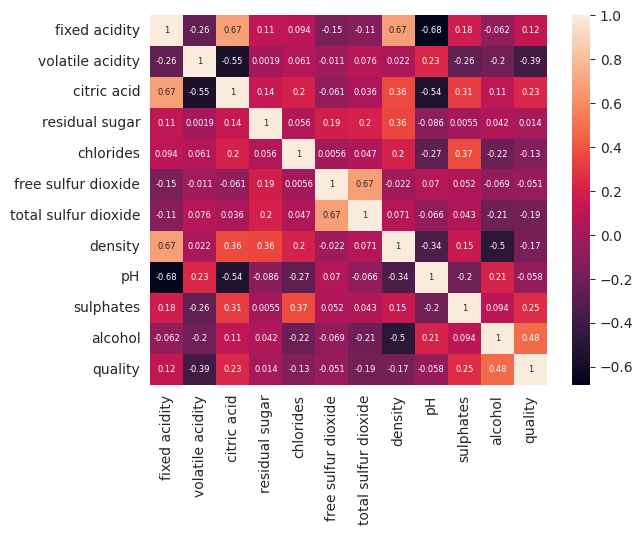

In [6]:
sns.heatmap(data.corr(), annot=True, annot_kws={"fontsize": 6})

As we can see - some variables are related to each other. Multicollinearity probably will be a problem. We have to remember about that and deal with that

**To sum up - these are the biggest concerns about data and we will/should deal with them:**
1. Dependent Variable is numerical which is fine but has too many classes. We will decrease the number of classes(bin them) and examine whether the problem with unbalanced data is that serious or we can left it as it is.
2. Data is mostly right-skewed and has lots of outliers. We have to scale variables. Best option is **MinMaxScaler**. It is better option when data is not normally distributed. Outliers are kinda problematic thing. Usually it's a problem with a measure and should be deleted but it is also possible that they are real values for some qualities and the values are corrent.
3. There is correlation between independent variables known as collinearity problem. We have to solve that.

**Firstly we will encode our dependent variable again and split our data into test set and train set...
We will also delete independent variables which have high correlation value with another variables but low with quality.
Variables choosen to delete: pH, citric acid**

In [7]:
classes = {3:'Bad',4:'Bad',5:'Medium',6:'Medium',7:'Good',8:'Good'}
Y = Y.replace(classes)
X.drop(inplace=True, axis=1, columns=['pH','citric acid'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=13, test_size=.2)

Now we can saftely scale our data using MinMaxScaler which is better in scaling not normally distributed data.

In [8]:
#We will also scale our data:
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

Now the last part - fitting a model and tuning hyperparameters if necessary. We will start with simple LogistcRegression, but we will also try DecisionTreeClassifier, RandomForestClassifier and KNN.
I'm also curious whether oversampling like SMOTE would improve the results. The frequency of classes are not perfectly balanced but the difference isn't enormous. Maybe in the future we will test with balanced classes.

<AxesSubplot: xlabel='quality', ylabel='count'>

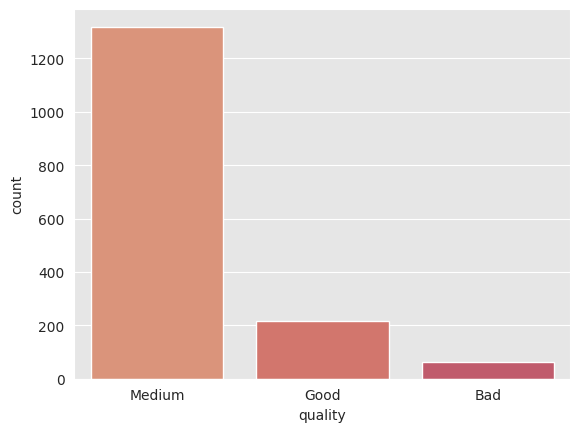

In [9]:
sns.countplot(x=Y)
# Dominance of Medium class is big

In [10]:
for i in [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]:
    model = i
    model.fit(X_train, y_train)
    print('Accuracy for train set:', model.score(X_test, y_test), ' in model ', i)

Accuracy for train set: 0.865625  in model  LogisticRegression()
Accuracy for train set: 0.878125  in model  RandomForestClassifier()
Accuracy for train set: 0.8  in model  DecisionTreeClassifier()
Accuracy for train set: 0.865625  in model  KNeighborsClassifier()


We will probably keep LogisticRegression(). I like interpretability of that model. We will use l2 penalty and look for the best C parameter.
If C is very small, the model will be very simple but may not fit the training data well. If C is very large, the model will be more complex and may fit the training data very well, but may not generalize well to new data.

In [11]:
C = [0.01, 0.1, 10, 100]
for i,c in enumerate(C):
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    print('C=',c, ' accuracy: ',model.score(X_test,y_test))

C= 0.01  accuracy:  0.84375
C= 0.1  accuracy:  0.84375
C= 10  accuracy:  0.86875
C= 100  accuracy:  0.8625


As we can see C=10 obtain pretty good results. We will keep it.

Final model:

In [12]:
model = LogisticRegression(C=1)
model.fit(X_train, y_train)
print('Train score: ', model.score(X_train, y_train))
print('Test score: ', model.score(X_test, y_test))

Train score:  0.8405003909304144
Test score:  0.865625
